# Qiskit Quantum Programming Features You Probably Don’t Know About
**Luciano Bello**  
Qiskit DevRel Team Lead  
IBM Quantum

<div>
<img src="qiskit_overview.png" width="700"/>
</div>

# Qiskit Terra Features You Probably Don’t Know About
**Luciano Bello**  
Qiskit DevRel Team Lead  
IBM Quantum

## First things first

In [1]:
from qiskit import __version__
__version__

'0.21.0.dev0+ce4f94d'

In [2]:
from qiskit import __qiskit_version__
__qiskit_version__

{'qiskit-terra': '0.21.0.dev0+ce4f94d', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': None, 'qiskit-nature': '0.3.2', 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

## The simplest of the examples

In [3]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()

In [4]:
circuit.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

## Arbitrary rotations

In [5]:
from numpy import pi 
circuit = QuantumCircuit(1)
circuit.u(pi/2,pi/2,pi/2,0)
circuit.draw()

┌────────────────┐
q: ┤ U(π/2,π/2,π/2) ├
   └────────────────┘

In [6]:
from qiskit import Aer
from qiskit.visualization import array_to_latex
from qiskit import transpile


backend = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(circuit, backend))
array_to_latex(job.result().get_unitary(circuit, decimals=3))

<IPython.core.display.Latex object>

## Any unitary

In [7]:
matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]
          
circuit = QuantumCircuit(2)
circuit.unitary(matrix, [0, 1])
circuit.draw()

┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘

synthesis!

In [8]:
circuit.decompose().draw()

global phase: 1.5695
     ┌───────────────────┐     ┌───────────────────┐
q_0: ┤ U3(π/2,0.18021,0) ├──■──┤ U3(π/2,-π,2.9614) ├
     ├───────────────────┤┌─┴─┐├───────────────────┤
q_1: ┤ U3(π/2,0,-1.5695) ├┤ X ├┤ U3(π/2,-1.5695,0) ├
     └───────────────────┘└───┘└───────────────────┘

### Classical logic

In [9]:
# Classical logic
from qiskit.circuit import classical_function, Int1

@classical_function
def oracle(x: Int1, y: Int1, z: Int1) -> Int1:
    return not x and (y or z)

circuit = QuantumCircuit(4)
circuit.append(oracle, [0, 1, 2, 3])
circuit.draw()

┌─────────┐
q_0: ┤0        ├
     │         │
q_1: ┤1        ├
     │  Oracle │
q_2: ┤2        ├
     │         │
q_3: ┤3        ├
     └─────────┘

In [10]:
circuit.decompose().draw()

q_0: ──o────o──
       │    │  
q_1: ──■────┼──
       │    │  
q_2: ──o────■──
     ┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├
     └───┘└───┘

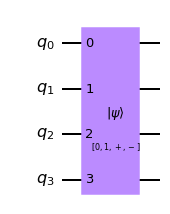

In [11]:
init = QuantumCircuit(4)

init.initialize('01+-')
init.draw('mpl')

### Initialize

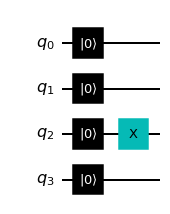

In [12]:
init = QuantumCircuit(4)

init.initialize('0100')
init.decompose().decompose().draw('mpl')

In [13]:
init.barrier()
new_circuit = init.compose(circuit)
new_circuit.measure_all()
new_circuit.draw()

┌──────────────────────┐ ░ ┌─────────┐ ░ ┌─┐         
   q_0: ┤0                     ├─░─┤0        ├─░─┤M├─────────
        │                      │ ░ │         │ ░ └╥┘┌─┐      
   q_1: ┤1                     ├─░─┤1        ├─░──╫─┤M├──────
        │  Initialize(0,1,0,0) │ ░ │  Oracle │ ░  ║ └╥┘┌─┐   
   q_2: ┤2                     ├─░─┤2        ├─░──╫──╫─┤M├───
        │                      │ ░ │         │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤3                     ├─░─┤3        ├─░──╫──╫──╫─┤M├
        └──────────────────────┘ ░ └─────────┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════════════════════════════════╩══╩══╩══╩═
                                                  0  1  2  3

In [14]:
new_circuit.decompose().decompose().draw()

░ ┌───┐     ┌───┐┌───┐     ┌───┐ ░ ┌─┐         
   q_0: ─|0>───────░─┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├─░─┤M├─────────
                   ░ └───┘  │  └───┘└───┘  │  └───┘ ░ └╥┘┌─┐      
   q_1: ─|0>───────░────────■──────────────┼────────░──╫─┤M├──────
             ┌───┐ ░ ┌───┐  │  ┌───┐       │        ░  ║ └╥┘┌─┐   
   q_2: ─|0>─┤ X ├─░─┤ X ├──■──┤ X ├───────■────────░──╫──╫─┤M├───
             └───┘ ░ └───┘┌─┴─┐└───┘     ┌─┴─┐      ░  ║  ║ └╥┘┌─┐
   q_3: ─|0>───────░──────┤ X ├──────────┤ X ├──────░──╫──╫──╫─┤M├
                   ░      └───┘          └───┘      ░  ║  ║  ║ └╥┘
meas: 4/═══════════════════════════════════════════════╩══╩══╩══╩═
                                                       0  1  2  3

In [15]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(new_circuit.decompose().decompose(), simulator)  # workaround qiskit-terra/issues/7631

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts()
counts

{'1100': 1024}

In [16]:
oracle.simulate([False, False, True])

[True]

### controlled gates

In [17]:
circuit = QuantumCircuit(4)
circuit.cx(0, 1)
circuit.ccx(0, 1, 2)
circuit.ch(0, 1)
circuit.draw()

q_0: ──■────■────■──
     ┌─┴─┐  │  ┌─┴─┐
q_1: ┤ X ├──■──┤ H ├
     └───┘┌─┴─┐└───┘
q_2: ─────┤ X ├─────
          └───┘     
q_3: ───────────────

In [18]:
circuit.cch(0, 1, 2)

AttributeError: 'QuantumCircuit' object has no attribute 'cch'

In [19]:
from qiskit.circuit.library import HGate
circuit.append(HGate(), [0])
circuit.draw()

┌───┐
q_0: ──■────■────■──┤ H ├
     ┌─┴─┐  │  ┌─┴─┐└───┘
q_1: ┤ X ├──■──┤ H ├─────
     └───┘┌─┴─┐└───┘     
q_2: ─────┤ X ├──────────
          └───┘          
q_3: ────────────────────

In [20]:
circuit.append(HGate().control(2), [0, 1, 2])
circuit.draw()

┌───┐     
q_0: ──■────■────■──┤ H ├──■──
     ┌─┴─┐  │  ┌─┴─┐└───┘  │  
q_1: ┤ X ├──■──┤ H ├───────■──
     └───┘┌─┴─┐└───┘     ┌─┴─┐
q_2: ─────┤ X ├──────────┤ H ├
          └───┘          └───┘
q_3: ─────────────────────────

In [21]:
circuit.append(HGate().control(2, ctrl_state="10"), [0, 1, 2])
circuit.draw()

┌───┐          
q_0: ──■────■────■──┤ H ├──■────o──
     ┌─┴─┐  │  ┌─┴─┐└───┘  │    │  
q_1: ┤ X ├──■──┤ H ├───────■────■──
     └───┘┌─┴─┐└───┘     ┌─┴─┐┌─┴─┐
q_2: ─────┤ X ├──────────┤ H ├┤ H ├
          └───┘          └───┘└───┘
q_3: ──────────────────────────────

In [22]:
circuit.append(HGate().control(3, ctrl_state="010"), [0, 3, 1, 2])
circuit.draw()

┌───┐               
q_0: ──■────■────■──┤ H ├──■────o────o──
     ┌─┴─┐  │  ┌─┴─┐└───┘  │    │    │  
q_1: ┤ X ├──■──┤ H ├───────■────■────o──
     └───┘┌─┴─┐└───┘     ┌─┴─┐┌─┴─┐┌─┴─┐
q_2: ─────┤ X ├──────────┤ H ├┤ H ├┤ H ├
          └───┘          └───┘└───┘└─┬─┘
q_3: ────────────────────────────────■──

### other gate modifiers

In [23]:
# power and to_matrix
sqrt_h = HGate().power(1/2)  # √H gate
array_to_latex(sqrt_h.to_matrix())

<IPython.core.display.Latex object>

In [24]:
circuit.append(sqrt_h, [1])
circuit.draw()

┌───┐                        
q_0: ──■────■────■──┤ H ├──■────o────o───────────
     ┌─┴─┐  │  ┌─┴─┐└───┘  │    │    │  ┌───────┐
q_1: ┤ X ├──■──┤ H ├───────■────■────o──┤ h^0.5 ├
     └───┘┌─┴─┐└───┘     ┌─┴─┐┌─┴─┐┌─┴─┐└───────┘
q_2: ─────┤ X ├──────────┤ H ├┤ H ├┤ H ├─────────
          └───┘          └───┘└───┘└─┬─┘         
q_3: ────────────────────────────────■───────────

In [25]:
from qiskit.circuit.library import RZGate
circuit.append(RZGate(3.14159/4), [1])
circuit.draw()

┌───┐                                    
q_0: ──■────■────■──┤ H ├──■────o────o───────────────────────
     ┌─┴─┐  │  ┌─┴─┐└───┘  │    │    │  ┌───────┐┌──────────┐
q_1: ┤ X ├──■──┤ H ├───────■────■────o──┤ h^0.5 ├┤ Rz(1π/4) ├
     └───┘┌─┴─┐└───┘     ┌─┴─┐┌─┴─┐┌─┴─┐└───────┘└──────────┘
q_2: ─────┤ X ├──────────┤ H ├┤ H ├┤ H ├─────────────────────
          └───┘          └───┘└───┘└─┬─┘                     
q_3: ────────────────────────────────■───────────────────────

In [26]:
# inverse
from qiskit.circuit.library import RZGate
rz_dag = RZGate(3.14159/4).inverse()
circuit.append(rz_dag, [1])
circuit.draw()

┌───┐                                                 
q_0: ──■────■────■──┤ H ├──■────o────o────────────────────────────────────
     ┌─┴─┐  │  ┌─┴─┐└───┘  │    │    │  ┌───────┐┌──────────┐┌───────────┐
q_1: ┤ X ├──■──┤ H ├───────■────■────o──┤ h^0.5 ├┤ Rz(1π/4) ├┤ Rz(-1π/4) ├
     └───┘┌─┴─┐└───┘     ┌─┴─┐┌─┴─┐┌─┴─┐└───────┘└──────────┘└───────────┘
q_2: ─────┤ X ├──────────┤ H ├┤ H ├┤ H ├──────────────────────────────────
          └───┘          └───┘└───┘└─┬─┘                                  
q_3: ────────────────────────────────■────────────────────────────────────

## callable passes

In [27]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.draw()

┌───┐
q: ┤ H ├
   └───┘

In [28]:
from qiskit.transpiler.passes import BasisTranslator
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary

result = BasisTranslator(SessionEquivalenceLibrary, ['rx', 'rz'])(circuit)
result.draw()

global phase: π/2
   ┌─────────┐┌─────────┐┌─────────┐
q: ┤ Rz(π/2) ├┤ Rx(π/2) ├┤ Rz(π/2) ├
   └─────────┘└─────────┘└─────────┘

## More resources!
 * This notebook: https://ibm.biz/QBN_20220503
 * YouTube 1-minute Qiskit: https://www.youtube.com/watch?v=NCsbWMnuCqc&list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e
 * Demoday: https://github.com/qiskit-community/feedback/wiki/Qiskit-DemoDays
 * Questions? https://quantumcomputing.stackexchange.com/questions/tagged/qiskit
 * Issues (dont forget to add the version!)? Contributions? https://github.com/Qiskit/qiskit-terra/